# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Inspect the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Inspect the first few samples
print("First few samples of X_train:\n", X_train[:5])
print("First few samples of y_train:\n", y_train[:5])
print("First few samples of X_test:\n", X_test[:5])
print("First few samples of y_test:\n", y_test[:5])

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

num_classes = 10  # Fashion MNIST has 10 classes
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

print("y_train_onehot shape:", y_train_onehot.shape)  # (60000, 10)
print("y_test_onehot shape:", y_test_onehot.shape)    # (10000, 10)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
First few samples of X_train:
 [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
First few samples of y_train:
 [9 0 0 3 0

Is ok after reviewing the dataset documentation

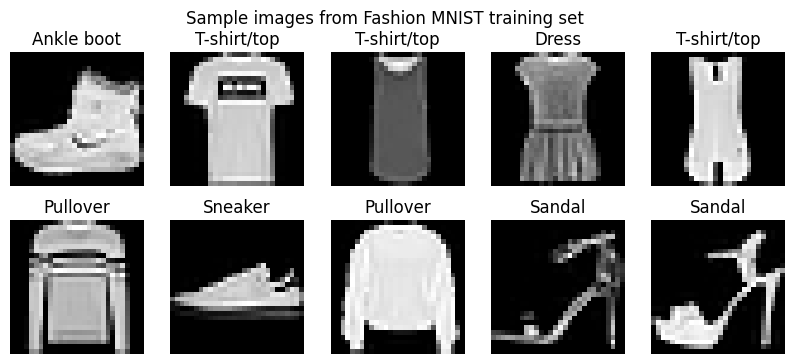

In [3]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.suptitle("Sample images from Fashion MNIST training set")
plt.show()


These are the first 10 but there are some repeated, so lets look the first per each class:

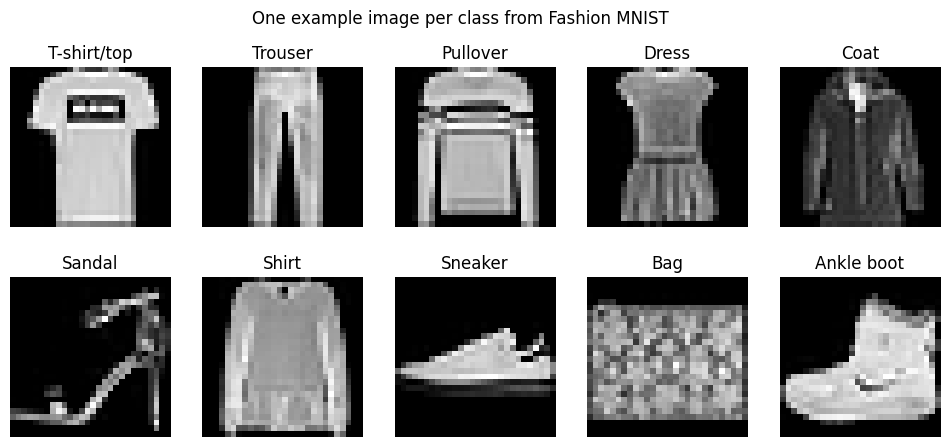

In [4]:
import matplotlib.pyplot as plt
import numpy as np

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(12, 5))

# For each class, find the first occurrence index in y_train
for class_idx in range(10):
    idx = np.where(y_train == class_idx)[0][0]  # first index of class_idx
    plt.subplot(2, 5, class_idx + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[class_idx])
    plt.axis('off')

plt.suptitle("One example image per class from Fashion MNIST")
plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

Yes, they look as expected but the quality is so low. However, after coming from the digits experiment with so low quality I believe wouldn't be a problem for ANN to learn from these patterns

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()

# You can use `model.add(<layer>)` to add layers to the model
## Flatten layer to convert 28x28 images to 784-length vectors
model.add(Flatten(input_shape=(28, 28)))

## Dense layer with 10 units (one per class), no activation (so we are creating a linear regression)
model.add(Dense(num_classes))

# Compile the model using `model.compile()`
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with `model.fit()`
model.fit(
    X_train, y_train_onehot,
    batch_size=128,
    epochs=10,
    validation_data=(X_test, y_test_onehot),
    verbose=2
)

# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
469/469 - 3s - 6ms/step - accuracy: 0.2301 - loss: 9.8926 - val_accuracy: 0.1835 - val_loss: 9.5336
Epoch 2/10
469/469 - 2s - 5ms/step - accuracy: 0.2734 - loss: 10.0116 - val_accuracy: 0.3476 - val_loss: 9.1802
Epoch 3/10
469/469 - 3s - 6ms/step - accuracy: 0.3251 - loss: 9.0048 - val_accuracy: 0.3407 - val_loss: 9.8564
Epoch 4/10
469/469 - 2s - 5ms/step - accuracy: 0.3296 - loss: 10.6505 - val_accuracy: 0.3173 - val_loss: 10.0286
Epoch 5/10
469/469 - 2s - 4ms/step - accuracy: 0.3250 - loss: 10.1766 - val_accuracy: 0.3198 - val_loss: 10.8751
Epoch 6/10
469/469 - 3s - 6ms/step - accuracy: 0.3232 - loss: 10.9700 - val_accuracy: 0.3348 - val_loss: 10.6719
Epoch 7/10
469/469 - 2s - 4ms/step - accuracy: 0.2775 - loss: 11.0794 - val_accuracy: 0.2744 - val_loss: 11.6531
Epoch 8/10
469/469 - 2s - 4ms/step - accuracy: 0.2907 - loss: 11.8075 - val_accuracy: 0.3098 - val_loss: 12.3776
Epoch 9/10
469/469 - 3s - 6ms/step - accuracy: 0.3156 - loss: 11.6243 - val_accuracy: 0.3241 - val_lo

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

Is very low (0.3425) because has only one layer without any single layer (like old times where ANN were not so adopted) and also is very basic model (linear regresion) meaning doesnt have a non linear activation function, not appropiate to this classification task.

Furthermore, this basic model doesnt exploit the spatial structure because it flatten 2d into 1d vector and didnt manage the pixels dependencies, it means cannot learn about edges, textures or shapes.

If we could use more advanced models like CNN which are specificilly designed to learn these spatial hierarchies because apply convulotional filters so we can detect patterns and help to generalize better.




# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [8]:
from keras.layers import Conv2D
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=10, batch_size=128, validation_split=0.1, verbose=2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
422/422 - 22s - 53ms/step - accuracy: 0.8082 - loss: 0.5606 - val_accuracy: 0.8622 - val_loss: 0.4021
Epoch 2/10
422/422 - 21s - 51ms/step - accuracy: 0.8702 - loss: 0.3761 - val_accuracy: 0.8808 - val_loss: 0.3499
Epoch 3/10
422/422 - 41s - 96ms/step - accuracy: 0.8838 - loss: 0.3359 - val_accuracy: 0.8853 - val_loss: 0.3309
Epoch 4/10
422/422 - 42s - 101ms/step - accuracy: 0.8909 - loss: 0.3142 - val_accuracy: 0.8817 - val_loss: 0.3322
Epoch 5/10
422/422 - 39s - 94ms/step - accuracy: 0.8960 - loss: 0.2965 - val_accuracy: 0.8942 - val_loss: 0.3058
Epoch 6/10
422/422 - 42s - 100ms/step - accuracy: 0.9009 - loss: 0.2832 - val_accuracy: 0.8913 - val_loss: 0.3119
Epoch 7/10
422/422 - 22s - 51ms/step - accuracy: 0.9047 - loss: 0.2717 - val_accuracy: 0.8948 - val_loss: 0.2992
Epoch 8/10
422/422 - 41s - 97ms/step - accuracy: 0.9083 - loss: 0.2618 - val_accuracy: 0.9025 - val_loss: 0.2832
Epoch 9/10
422/422 - 41s - 98ms/step - accuracy: 0.9112 - loss: 0.2534 - val_accuracy: 0.9017 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

This CNN model did perform much better than the baseline, improving from 34.5% to 89.4%, which account for 55% of improvement, which is substantial.

The improvement comes from mainly from 2 key aspects:

1) Convolutional Filters: this CNN model apply multiple filters to the input images. These filters can detect some local spatial patterns like edge, textures and shapes and now having this knowledge between neighour pixels let the model learn these hierarchical features.

2) Deep architecture with multiple layers: This CNN include 2 layers -one convolutional layer followed by a fully connected (dense) layer and also in this part by applying a softmax to put some non linear probability to the solution helps to improve.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

Filters: 16, Test Accuracy: 0.8731
Filters: 32, Test Accuracy: 0.8911
Filters: 64, Test Accuracy: 0.8971


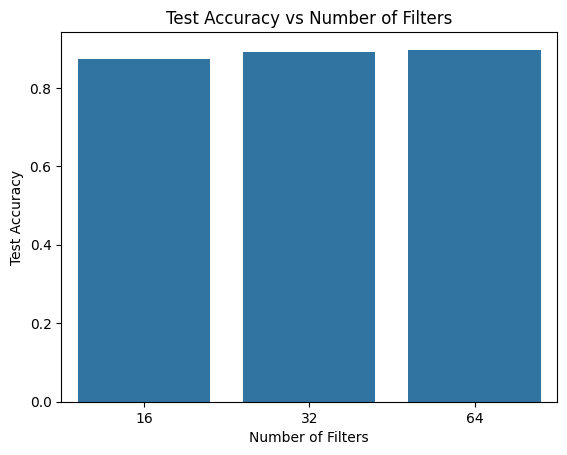

In [9]:
# A. Test Hyperparameters

from keras.layers import Conv2D
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

filter_options = [16, 32, 64]
results_hyper = []

for filters in filter_options:
    model = Sequential()
    model.add(Conv2D(filters=filters, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train_onehot, epochs=5, batch_size=128, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
    results_hyper.append({'filters': filters, 'test_accuracy': accuracy})
    print(f"Filters: {filters}, Test Accuracy: {accuracy:.4f}")

# Visualization
import pandas as pd
import seaborn as sns

df_hyper = pd.DataFrame(results_hyper)
sns.barplot(data=df_hyper, x='filters', y='test_accuracy')
plt.title('Test Accuracy vs Number of Filters')
plt.xlabel('Number of Filters')
plt.ylabel('Test Accuracy')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dropout: False, Test Accuracy: 0.8874
Dropout: True, Test Accuracy: 0.8837


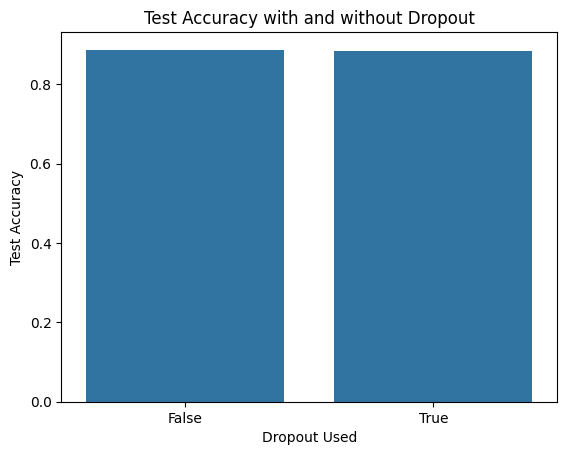

In [10]:
# B. Test presence or absence of regularization

from keras.layers import Dropout

dropout_options = [False, True]
filters_fixed = 32  # Fix filters to a reasonable value for this test
results_reg = []

for use_dropout in dropout_options:
    model = Sequential()
    model.add(Conv2D(filters=filters_fixed, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    if use_dropout:
        model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train_onehot, epochs=5, batch_size=128, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
    results_reg.append({'dropout': use_dropout, 'test_accuracy': accuracy})
    print(f"Dropout: {use_dropout}, Test Accuracy: {accuracy:.4f}")

# Visualization
df_reg = pd.DataFrame(results_reg)
sns.barplot(data=df_reg, x='dropout', y='test_accuracy')
plt.title('Test Accuracy with and without Dropout')
plt.xlabel('Dropout Used')
plt.ylabel('Test Accuracy')
plt.show()

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

A. Regarding the hyperparameters, changing the qty of filters improve but a little and are more computational expensive, thats why the 32 is the default value having a good balance in my case.

B. Although in my test the Dropout False (not regularization technique in use) was a little better, normally is better to use True. So we will prefer to use as a more robust technique.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Preparar datos (suponiendo que X_train, y_train, X_test, y_test ya están cargados y normalizados)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
num_classes = 10
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Construir el modelo final con 64 filtros y dropout
model_final = Sequential()
model_final.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_final.add(MaxPooling2D(pool_size=(2,2)))
model_final.add(Dropout(0.25))  # Regularización dropout para evitar sobreajuste
model_final.add(Flatten())
model_final.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_final.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo con 10 épocas para mejor convergencia
model_final.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model_final.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Final model test loss: {test_loss:.4f}")
print(f"Final model test accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 46s - 109ms/step - accuracy: 0.8199 - loss: 0.5262 - val_accuracy: 0.8672 - val_loss: 0.3760
Epoch 2/10
422/422 - 45s - 106ms/step - accuracy: 0.8749 - loss: 0.3579 - val_accuracy: 0.8848 - val_loss: 0.3348
Epoch 3/10
422/422 - 82s - 194ms/step - accuracy: 0.8869 - loss: 0.3234 - val_accuracy: 0.8853 - val_loss: 0.3325
Epoch 4/10
422/422 - 82s - 193ms/step - accuracy: 0.8931 - loss: 0.3002 - val_accuracy: 0.8928 - val_loss: 0.2991
Epoch 5/10
422/422 - 83s - 196ms/step - accuracy: 0.8993 - loss: 0.2859 - val_accuracy: 0.9033 - val_loss: 0.2835
Epoch 6/10
422/422 - 45s - 106ms/step - accuracy: 0.9048 - loss: 0.2709 - val_accuracy: 0.8965 - val_loss: 0.2946
Epoch 7/10
422/422 - 82s - 195ms/step - accuracy: 0.9070 - loss: 0.2613 - val_accuracy: 0.9022 - val_loss: 0.2796
Epoch 8/10
422/422 - 81s - 193ms/step - accuracy: 0.9103 - loss: 0.2528 - val_accuracy: 0.9007 - val_loss: 0.2780
Epoch 9/10
422/422 - 46s - 108ms/step - accuracy: 0.9128 - loss: 0.2450 - val_accuracy: 

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

-The final model of course will significantly outperform the baseline linear model because the inclusion of more appropiate architectures for image data.

-Compared to initial CNN, the final model showed slight improvement by tuning the number of filters and applying regularization technique (dropout). This approach remind me when talking about radar defense when you start by using low precision radar to check your borders but once is in your air you take the cost for more precise radars to improve your defense detection systems.

-The final model performance was influenced mainly for the ability to learn spacial feature by using CNN filters and more complex ANN architectures (layers)

-If I would have more time i would experiment with more hyperparameters suchs as more layers, maybe different kernel sizes and of course learning rates. Also I would investigate with image advanced technique like data augmentation, I would also try another optimizers and more epochs



🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.